### $\color{red}{\text{LAB 02  :  Image Processing }}$

#### $\color{black}{\text{Made by : Zahra BENSLIMANE}}$

***

### Readability 

    
What should we do to increase the readability of the image
aquitain.tif (in lab’s folder)?



In [9]:
# Importing the libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import random
from statistics import median

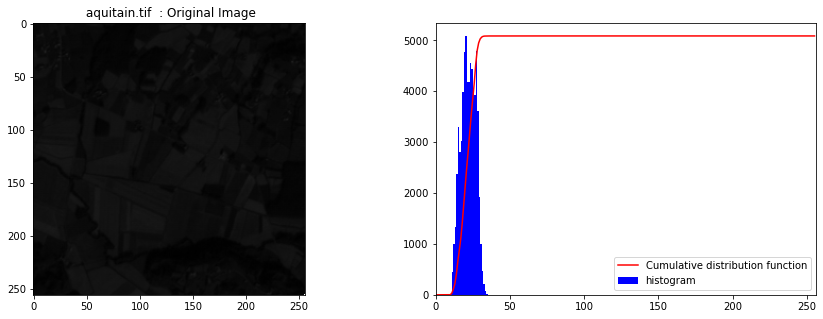

In [10]:
imageFolder = "Images_TP"

# Importing the aquitain.tif image
# open method used to open image file
I = cv.imread(imageFolder+"/aquitain.tif",cv.IMREAD_COLOR)[:,:,0]

# Plot the colored image
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
plt.imshow(I, cmap = 'gray')
plt.title(" aquitain.tif  : Original Image")

#dessin histogramme :
hist,bins = np.histogram(I.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'r')
plt.hist(I.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('Cumulative distribution function','histogram'), loc = 'lower right')
plt.show()

<div class="alert alert-info">

> **Note:** We can clearly see that this image is represented by a narrow range of intensity values. Our goal is to improve the readability of this image, and to do so, we will perform a Histogram Equalization.

>  A Histogram Equalization is method used to enhance the contrast of numerical images by effectively spreading out the highly populated intensity values and give the histogramme the more uniform propability law possible.

> The method is constructed from cumulative histogram of the original image and consists on applying a transformation on each pixel of the image independantly 

$$I^j(x,y) = \frac{I(x,y)- I_{min}}{I_{max} - I_{min}} * 255$$

</div>

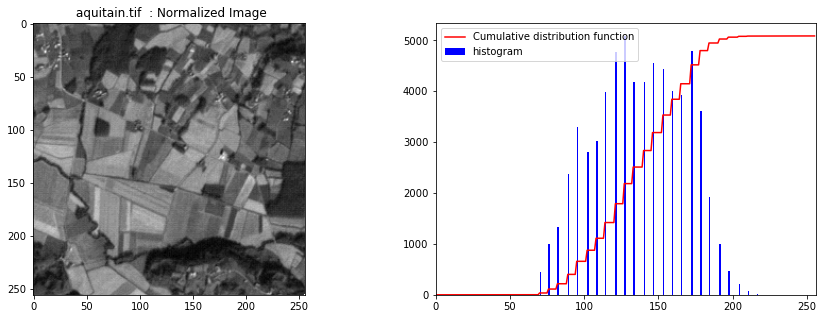

In [11]:
# Afunction to limit num between min value and max value
def clamp(num, min_value, max_value):
    return max(min(num, max_value), min_value)

# Initializing the Look UP Table
LUT = np.zeros(256)  
Imin = 0
Imax = 40
for i in range(255):
    LUT[i] = int(clamp((255 * ( i - Imin )/( Imax - Imin )),0,255))

# Updating our image intensities with the look up table
width = I.shape[0]
height = I.shape[1]
I_hist_equalized = np.zeros((width,height))
for x in range(width):
    for y in range(height):        
        I_hist_equalized[x,y] = LUT[I[x,y]] 

# Plot the image
plt.figure(figsize =(15,5))
plt.subplot(1,2,1); plt.imshow(I_hist_equalized, cmap = 'gray'); plt.title(" aquitain.tif  : Normalized Image")

# plotting histogramme :
hist,bins = np.histogram(I_hist_equalized.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'r')
plt.hist(I_hist_equalized.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('Cumulative distribution function','histogram'), loc = 'upper left')
plt.show()


<div class="alert alert-success">
    
This method is quiet usefull for sattellite images,where the brightness of the image can be very low at some times of day.

</div>

### Filtering 

The principle of filtering is to modify the value of the pixels of an
image, generally in order to improve its appearance. In practice, this involves
creating a new image using the pixel values of the original image. A filter is a
mathematical transformation (called a convolution product) allowing the
value of a pixel to be modified as a function of the values of neighbouring
pixels, assigned coefficients. Calculations are made for each of the three
colour components. The filter is represented by a table (a matrix),
characterized by its dimensions and its coefficients, the centre of which
corresponds to the pixel concerned. Usually, the sum of the coefficients from
the convolution kernel to be equal to 1, in order to obtain a usual value of the
resulting gray level, whatever the initial situation (NB: it is possible to work with
filters not checking this property but the result will have to be limited - so there
will be a loss of information). Recall that the values of the components of the
pixels are originally integers between 0 and 255. If the new values are not
integers, they will have to be rounded.

***

#### a - Smoothing
The table below makes the image more blurred. This is an
example of low pass filter. Applying this kernel consists in replacing the
value of each pixel by the average of the 9 pixels forming a square around
the targeted pixel. Implement and test this filter.


$$\begin{bmatrix} 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \end{bmatrix}$$

(729, 740, 3)


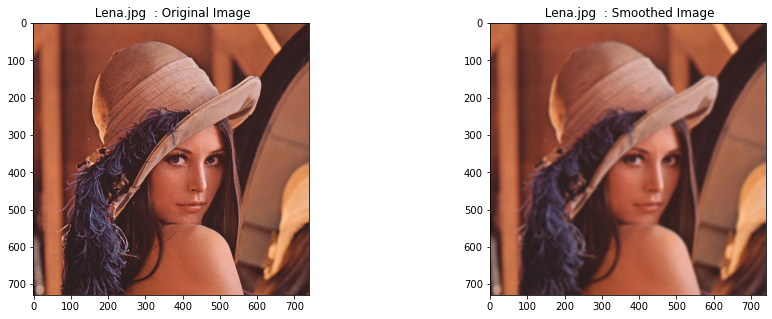

In [12]:
# Week smoothing with 3x3 kernel
filterSize = 9     # kernel dimension filterSize*filterSize
Averaging_kernel= np.ones((filterSize,filterSize),np.float32)/(filterSize**2)

# Loading an image
I = cv.imread(imageFolder+"/Lena.jpg",cv.IMREAD_COLOR)

# Convolution 2D on RGB image
filteredImage = cv.filter2D(I,-1,Averaging_kernel) # Depth of the output image [ -1 will give the output image depth as same as the input image]

for x in range(filteredImage.shape[0]):
    for y in range(filteredImage.shape[1]):
        for z in range(filteredImage.shape[2]):
            filteredImage[x,y,z]= clamp(filteredImage[x,y,z],0,255)
            
            
# Plot the original image
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(I, cv.COLOR_BGR2RGB)); plt.title(" Lena.jpg  : Original Image")
            
# Plot the filtered image
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(filteredImage, cv.COLOR_BGR2RGB)); plt.title(" Lena.jpg  : Smoothed Image")
print(filteredImage.shape)


<div class="alert alert-info">

> **Note:** Average filtering is a method of ‘smoothing’ images by
reducing the amount of intensity variation between neighbouring
pixels.The average filter works by moving through the image pixel by pixel,
replacing each value with the average value of neighbouring pixels,
including itself.
    
There are some potential problems:

> -  A single pixel with a very unrepresentative value can significantly
affect the average value of all the pixels in its neighbourhood.

> - When the filter neighbourhood straddles an edge, the filter will
interpolate new values for pixels on the edge and so will blur that
edge. This may be a problem if sharp edges are required in the
output.

</div>

***
#### b- Accentuation. 
At the opposite, the table below will make the image
sharper. This is an example of high pass filter.

Remark: it may happen that
the new value is no longer between 0 and 255. It will therefore always be
necessary to take min (x, 255) and max (x, 0), where x is the new value.
Implement and test this filter.

$$\begin{bmatrix} 0 & -0.5 & 0 \\ -0.5 & 3 & -0.5 \\ 0 & -0.5 &  0 \end{bmatrix}$$


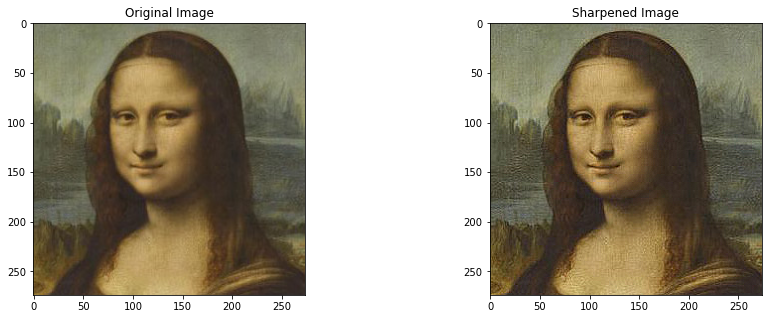

In [13]:
# Loading an image
I = cv.imread(imageFolder+"/MonaLisa_square.jpg",cv.IMREAD_COLOR)

# Defining the filter kernel
sharpen_kernel = np.array([[0, -0.5, 0], [-0.5, 3, -0.5],[0, -0.5, 0] ])

# 2D convolution : same size as input image
sharpenedImage = cv.filter2D(I,-1,sharpen_kernel)

i,j,k = sharpenedImage.shape
for x in range(i):
    for y in range(j):
        for z in range(k):
            sharpenedImage[x,y,z]= clamp(sharpenedImage[x,y,z],0,255)
            
# Plot the colored image
plt.figure(figsize = (15,5))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(I, cv.COLOR_BGR2RGB)); plt.title("Original Image")

# Plot the filtered Image
plt.subplot(1,2,2);plt.imshow(cv.cvtColor(sharpenedImage, cv.COLOR_BGR2RGB)); plt.title("Sharpened Image"); plt.show()

***
#### Gradient (Sobel filter)
To make it simple, the operator calculates the
gradient of the intensity of each pixel. This indicates the direction of the
greatest change from light to dark, as well as the rate of change in that
direction. We then know the points of sudden change in brightness,
probably corresponding to edges. Implement and test this filter


$$\begin{bmatrix} -1 & 0 & 2 \\ -2 & 0 & 2 \\ -1 & 0 &  1 \end{bmatrix}$$

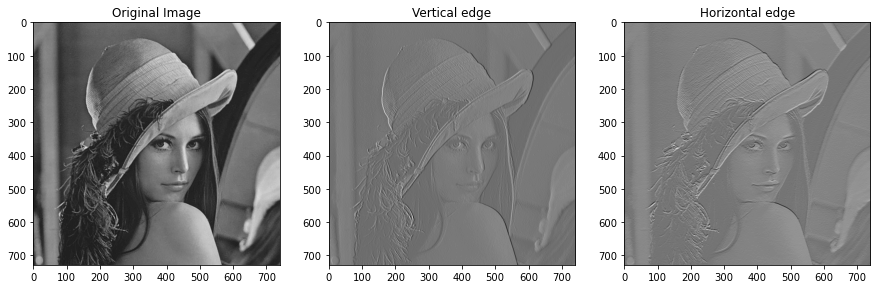

In [14]:
def rgb2gray(rgb):
    rgb = cv.cvtColor(rgb, cv.COLOR_BGR2RGB)
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# Loading an image
I = rgb2gray(cv.imread(imageFolder+"/Lena.jpg",cv.IMREAD_COLOR))

# Defining the filter kernel
vertical_sobel_kernel = np.array([[-1, 0, 2], [-2, 0, 2],[-1, 0, 1] ])
horizontal_sobel_kernel = np.flip(vertical_sobel_kernel.T, axis=0)

# 2D convolution : same size as input image
vertical_edge   = cv.filter2D(I,-1,vertical_sobel_kernel)
horizontal_edge = cv.filter2D(I,-1,horizontal_sobel_kernel)

# Plot the colored image
plt.figure(figsize = (15,5))
plt.subplot(1,3,1); plt.imshow(I, cmap = 'gray'); plt.title("Original Image")

# Plot Vertical edge
plt.subplot(1,3,2);plt.imshow(vertical_edge, cmap = 'gray'); plt.title("Vertical edge"); 

# Plot Horizontal edge
plt.subplot(1,3,3);plt.imshow(horizontal_edge, cmap = 'gray'); plt.title("Horizontal edge"); 



<div class="alert alert-info">

> **Note:** The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges, using one kernel for each of the two perpendicular orientations.

</div>

### Smoothing Non-Linear Filters : The median filter 

* Median filtering is a nonlinear method used to remove noise from
images.It is widely used as it is very effective at removing noise while
preserving edges.

* It is particularly effective at removing ‘salt and pepper’ type noise.

* The median filter works by moving through the image pixel by pixel, replacing each value with the median value of neighbouring pixels.

* The median is calculated by first sorting all the pixel values from thewindow into numerical order, and then replacing the pixel being considered with the middle (median) pixel value. 

We will Develop a script in two steps. The first will add noise to an image: a
certain number of random pixels will be replaced by white pixels. This
instruction will be called "noise". The second will eliminate this noise using
a median filter. For a color image, this filter will be applied to the three
RGB components separately. 


In [15]:
def addNoise(I,intensity = "medium"):

    output  = I.copy()
    # Getting the dimensions of the image
    row , col, channel = I.shape
    
    # Randomly pick some pixels in the
    # image for coloring them white
    if intensity == "high":
        number_of_pixels = random.randint(50000, 100000)
    elif intensity == "low":
        number_of_pixels = random.randint(1000, 5000)
    elif intensity =="medium":
        number_of_pixels = random.randint(5000, 50000)  
    else:
        print("Please Select one of these noise intensity levels : low, medium, high")
        
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        output[y_coord,x_coord,0] = 255
        output[y_coord,x_coord,1] = 255
        output[y_coord,x_coord,2] = 255
        
    return output   

Text(0.5, 1.0, ' Noisy Image')

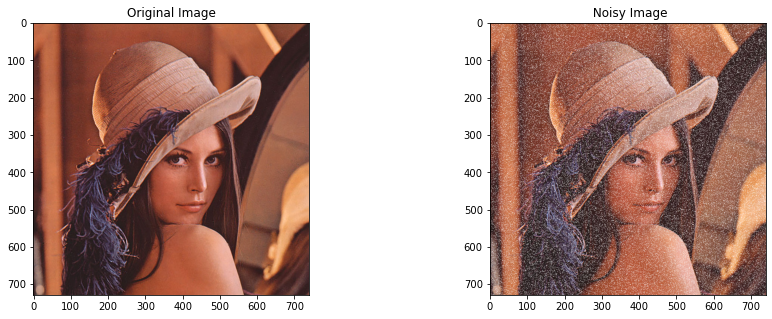

In [16]:
# Loading an image
I = cv.imread(imageFolder+"/Lena.jpg",cv.IMREAD_COLOR)

# Addind salt noise
noisyImage = addNoise(I,"high")

# Plot the original image
plt.figure(figsize = (15,5))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(I, cv.COLOR_BGR2RGB)); plt.title("Original Image")

# Plot Noisy image
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(noisyImage, cv.COLOR_BGR2RGB)); plt.title(" Noisy Image")

**Now that we introduiced the noisy into the image, we will try to reduce it as much as possible without loosing too much of valuable information.**

#### Defining the median filter

In [17]:
def medianFilter(I,KernelSize):
    output = np.zeros(I.shape)
    # Getting the dimensions of the image
    row , col, channel = I.shape
    # neigborsReach : means how far the center of the kernel can reach its limit in the left, right,up, down directions
    neigborsReach = int((KernelSize-1)/2 )
    for x in range( 2 ,row):
        for y in range( 2, col):  
            for k in range(3):
                    window = I[ x-neigborsReach : x+neigborsReach+1 , y-neigborsReach : y+neigborsReach+1, k]
                    window = np.sort( window.flatten())
                    output[x,y,k] = median(window)
    return output

<div class="alert alert-danger">BE PATIENT WITH THIS NEXT CELL? IT MAY TAKE A WHILE TO COMPUTE  :) 
    </div>

In [18]:
filteredImage = medianFilter(noisyImage,3)
filteredImage2 = medianFilter(filteredImage,3)

C:\Users\zahra\anaconda3\lib\statistics.py:435: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


Text(0.5, 1.0, ' Clear Image 2 ')

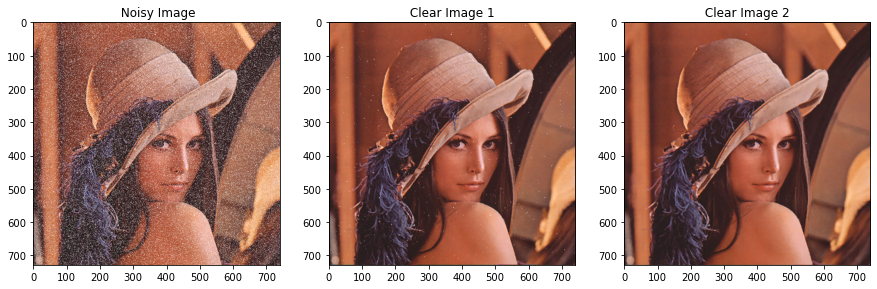

In [19]:
plt.figure(figsize = (15,5))
# Plot Noisy image
plt.subplot(1,3,1); plt.imshow(cv.cvtColor(noisyImage, cv.COLOR_BGR2RGB)); plt.title(" Noisy Image")

# Plot filtered image 1 
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(filteredImage.astype(np.uint8) , cv.COLOR_BGR2RGB)); plt.title(" Clear Image 1 ")

# Plot filtered image 2
plt.subplot(1,3,3); plt.imshow(cv.cvtColor(filteredImage2.astype(np.uint8) , cv.COLOR_BGR2RGB)); plt.title(" Clear Image 2 ")

**On the left is an image containing a significant amount of salt and
pepper noise. On the right is the same image after processing with
an median filter once and then twice.**

We can perform the same operation with the openCV built in function
```python
median = cv.medianBlur(Image,5)   #5 the size of the kernel
```

### Clean-up periodical noise. 
Propose an algorithm / script to suppress the
periodical noise in images noise.tif and clown.tif

Text(0.5, 1.0, 'TFD Image')

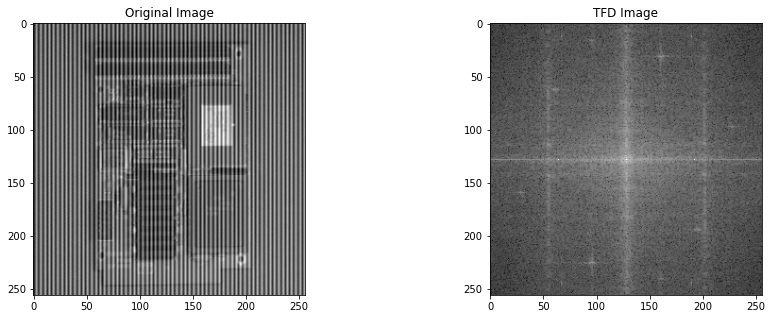

In [20]:
# Loading an image
I = cv.imread(imageFolder+"/noise.tif",cv.IMREAD_COLOR)  
I = rgb2gray(I)

# Calcul de la TFD
tfd = np.fft.fftshift(np.fft.fft2(I))

# Plot the original image
plt.figure(figsize = (15,5))
plt.subplot(1,2,1); plt.imshow(I, cmap ='gray'); plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(np.log(abs(tfd)), cmap='gray'); plt.title("TFD Image")

In the image we can see two very clear distortions. The white vertical and horizontal lines refer to the sharp horizontal and vertical elements of the image. Let us see what happens if we mask one of them.

<ipython-input-21-5f047982ff87>:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(out)), cmap='gray'); plt.title("TFD Image")


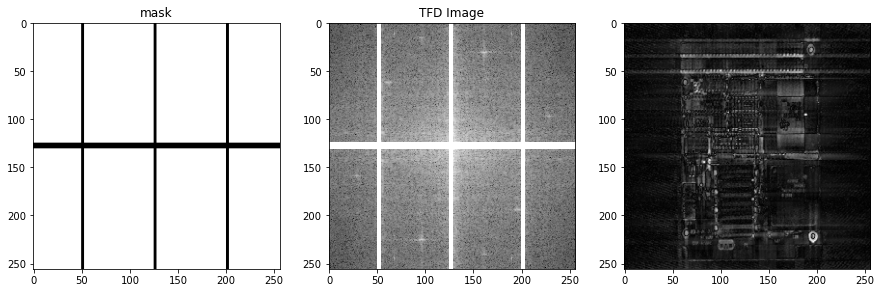

In [21]:
# Defining the mask
mask = np.ones(tfd.shape)

mask[125:131,:] = 0
mask[:,125:128] = 0
mask[:,50:53]   = 0
mask[:,200:203] = 0

out = np.multiply(tfd,mask)

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(abs(mask), cmap='gray'); plt.title("mask")

plt.subplot(1,3,2)
plt.imshow(np.log(abs(out)), cmap='gray'); plt.title("TFD Image")

plt.subplot(1,3,3)
plt.imshow(abs(np.fft.ifft2(out)), cmap='gray')

* By masking the visible lines in the DFT on the image, we do loose the perdiodical noise, but also a lot of the interesting information on the image itself and mostly only got the global edges and stucture.

-> Lets try a Low pass filter !

In [22]:
def frequency_LowPass(I, min1, max1, min2, max2):
    
    # Computing the DFT of the image
    tfd = np.fft.fftshift(np.fft.fft2(I))
    
    # Defining the mask
    mask = np.zeros(I.shape)
    mask[min1:max1, min2:max2] = 1
    
    # filtering in the frequency domain : pixel-wise multiplication
    outputImage = np.multiply(tfd,mask)
    
    return outputImage,tfd,mask

<ipython-input-23-dcf5fd4929fb>:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(outputImage)), cmap='gray'); plt.title("Filtered DFT")


Text(0.5, 1.0, 'Output Image')

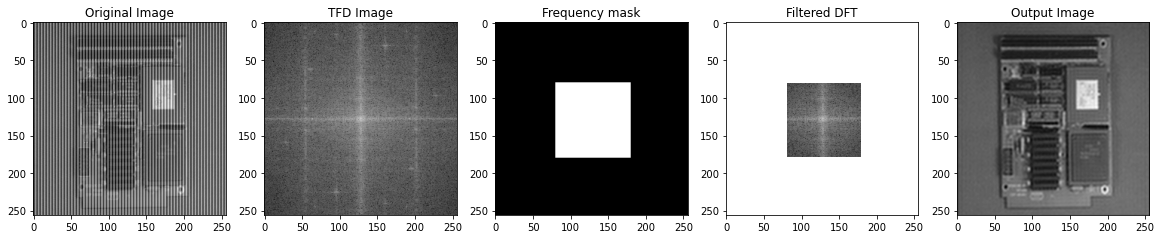

In [23]:
# Loading an image
I = cv.imread(imageFolder+"/noise.tif",cv.IMREAD_COLOR)  
I = rgb2gray(I)

outputImage,tfd,mask = frequency_LowPass(I, 80, 180, 80, 180)

# Plot the original image
plt.figure(figsize = (20,10))
plt.subplot(1,5,1); plt.imshow(I, cmap ='gray'); plt.title("Original Image")

# Plot the Discrete Fourier Transform of the image
plt.subplot(1,5,2)
plt.imshow(np.log(abs(tfd)), cmap='gray'); plt.title("TFD Image")

# plot the frequency domain mask
plt.subplot(1,5,3)
plt.imshow(abs(mask), cmap='gray'); plt.title("Frequency mask")

# plot the filtered DFT
plt.subplot(1,5,4)
plt.imshow(np.log(abs(outputImage)), cmap='gray'); plt.title("Filtered DFT")

# Output image
plt.subplot(1,5,5)
plt.imshow(abs(np.fft.ifft2(outputImage)), cmap='gray'); plt.title("Output Image")

<div class="alert alert-success">Low pass filter works better it this case.</div>

<ipython-input-29-c7eec8ba38ea>:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(outputImage)), cmap='gray'); plt.title("Filtered DFT")


Text(0.5, 1.0, 'Output Image')

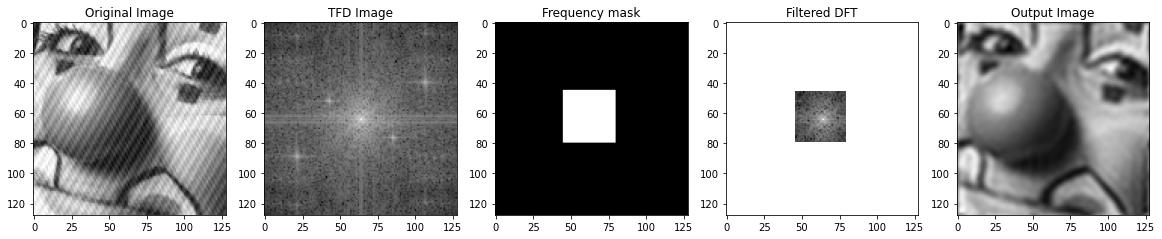

In [29]:
# Loading an image
I = cv.imread(imageFolder+"/clown.tif",cv.IMREAD_COLOR)  
I = rgb2gray(I)

outputImage,tfd,mask = frequency_LowPass(I, 45, 80, 45, 80)

# Plot the original image
plt.figure(figsize = (20,10))
plt.subplot(1,5,1); plt.imshow(I, cmap ='gray'); plt.title("Original Image")

# Plot the Discrete Fourier Transform of the image
plt.subplot(1,5,2)
plt.imshow(np.log(abs(tfd)), cmap='gray'); plt.title("TFD Image")

# plot the frequency domain mask
plt.subplot(1,5,3)
plt.imshow(abs(mask), cmap='gray'); plt.title("Frequency mask")

# plot the filtered DFT
plt.subplot(1,5,4)
plt.imshow(np.log(abs(outputImage)), cmap='gray'); plt.title("Filtered DFT")

# Output image
plt.subplot(1,5,5)
plt.imshow(abs(np.fft.ifft2(outputImage)), cmap='gray'); plt.title("Output Image")

***
### Noise reduction / suppression
Propose a script to clean mercury.tif and
noisy_Lena.png images.

Text(0.5, 1.0, ' Cleared twice Image')

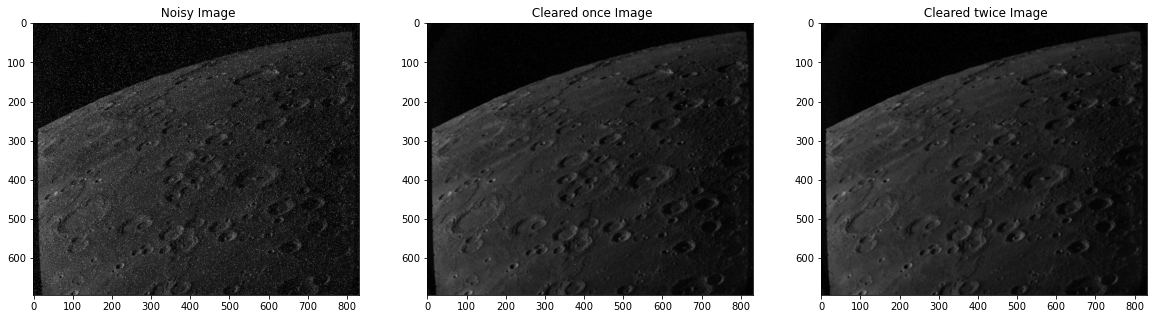

In [25]:
# Loading an image
I = cv.imread(imageFolder+"/Mercury.tif",cv.IMREAD_COLOR)  
# Filtering 
clearImage = cv.medianBlur(I,3)
clearImage2 = cv.medianBlur(clearImage,3)
# Plotting
plt.figure(figsize = (20,5))
plt.subplot(1,3,1); plt.imshow(cv.cvtColor(I, cv.COLOR_BGR2RGB)); plt.title(" Noisy Image")
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(clearImage.astype(np.uint8), cv.COLOR_BGR2RGB)); plt.title(" Cleared once Image")
plt.subplot(1,3,3); plt.imshow(cv.cvtColor(clearImage2.astype(np.uint8), cv.COLOR_BGR2RGB)); plt.title(" Cleared twice Image")


<ipython-input-26-78429ab54e18>:26: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(output)), cmap='gray'); plt.title("Filtered DFT")
<ipython-input-26-78429ab54e18>:50: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(outputImage)), cmap='gray'); plt.title("Filtered DFT")


Text(0.5, 1.0, 'Output Image')

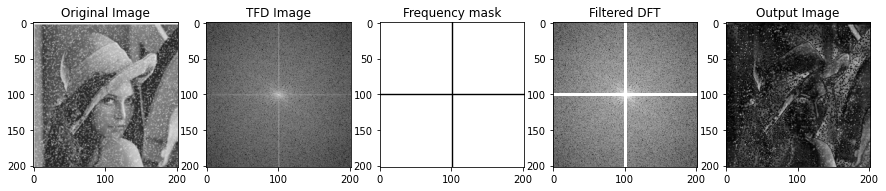

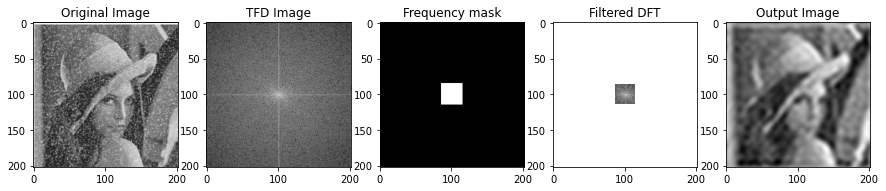

In [26]:
# Loading an image
I = cv.imread(imageFolder+"/noisy_Lena.png",cv.IMREAD_COLOR)  
I = rgb2gray(I)

# Calcul de la TFD
tfd = np.fft.fftshift(np.fft.fft2(I))
mask = np.ones(tfd.shape)
mask[100:102,:] = 0
mask[:,100:102] = 0
output = np.multiply(tfd,mask)

# Plot the original image
plt.figure(figsize = (15,10))
plt.subplot(1,5,1); plt.imshow(I, cmap ='gray'); plt.title("Original Image")

# Plot the Discrete Fourier Transform of the image
plt.subplot(1,5,2)
plt.imshow(np.log(abs(tfd)), cmap='gray'); plt.title("TFD Image")

# plot the frequency domain mask
plt.subplot(1,5,3)
plt.imshow(abs(mask), cmap='gray'); plt.title("Frequency mask")

# plot the filtered DFT
plt.subplot(1,5,4)
plt.imshow(np.log(abs(output)), cmap='gray'); plt.title("Filtered DFT")

# Output image
plt.subplot(1,5,5)
plt.imshow(abs(np.fft.ifft2(output)), cmap='gray'); plt.title("Output Image")

####################################################################################################################

# Calcul de la TFD
outputImage,tfd,mask = frequency_LowPass(I,85, 115, 85, 115)
# Plot the original image
plt.figure(figsize = (15,10))
plt.subplot(1,5,1); plt.imshow(I, cmap ='gray'); plt.title("Original Image")

# Plot the Discrete Fourier Transform of the image
plt.subplot(1,5,2)
plt.imshow(np.log(abs(tfd)), cmap='gray'); plt.title("TFD Image")

# plot the frequency domain mask
plt.subplot(1,5,3)
plt.imshow(abs(mask), cmap='gray'); plt.title("Frequency mask")

# plot the filtered DFT
plt.subplot(1,5,4)
plt.imshow(np.log(abs(outputImage)), cmap='gray'); plt.title("Filtered DFT")

# Output image
plt.subplot(1,5,5)
plt.imshow(abs(np.fft.ifft2(outputImage)), cmap='gray'); plt.title("Output Image")

Text(0.5, 1.0, ' Median Image 2')

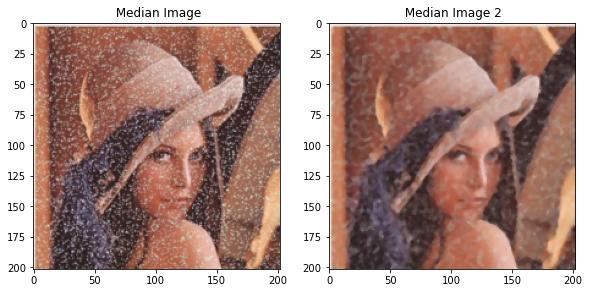

In [27]:
# Loading an image
I = cv.imread(imageFolder+"/noisy_Lena.png")  

median = cv.medianBlur(I,3)
median2 = cv.medianBlur(median,3)

# Defining the filter kernel
sharpen_kernel = np.array([[0, -0.5, 0], [-0.5, 3, -0.5],[0, -0.5, 0] ])

# Output image
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(cv.cvtColor(I.astype(np.uint8) , cv.COLOR_BGR2RGB)); plt.title(" Median Image")
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(median2.astype(np.uint8) , cv.COLOR_BGR2RGB)); plt.title(" Median Image 2")

* The mercury image was cleared by median filters.
* Had Troubles clearing the Noisy Lena image.